<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/kaggle_google_play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore') 



#DESCRIÇÃO DA PROBLEMÁTICA
Esse notebook consiste em descrever os dados dos aplicativos da Google App Store. O database é de

> dados coletados da web de 10 mil aplicativos da Play Store para análise do mercado Android. 

As variáveis do banco de dados analisado no arquivo *googleplaystore.csv* são:
*   **Category**: a categorial a qual o app pertence;
*   **Rating**: Avaliação dos usuários;
*   **Reviews**: Número de revisões realizadas no app;
*   **Size**: Tamanho do aplicativo;
*   **Installs**: Número de usuários que realizaram o download ou instalaram o app;
*   **Type**: gratuito ou pago;
*   **Price**: preço do app quando pago;
*   **Content** Rating: Faixa etária à qual o aplicativo é direcionado;
*   **Genres**:Um aplicativo pode pertencer a vários gêneros (além de sua categoria principal). Por exemplo, um jogo musical familiar pertencerá aos gêneros Música, Jogo, Família.












#OBTENÇÃO DOS DADOS
Nessa etapa é descrito duas formas de obter os dados. Deve ser escolhida apenas uma e atentar para quais linhas podem ser executadas sempre ou não.


##Kaggle e Google Drive
> Para realizar esse método é necessário ter uma conta no Kaggle e ter configurado o seu Google Drive para executar o download.


No código a seguir são realizadas as seguintes ações:

1.   conexão com o google drive;

2.   download dos dados obtidos no [Kaggle - Database - Google App Store](https://www.kaggle.com/lava18/google-play-store-apps/notebooks?sortBy=voteCount&group=everyone&pageSize=20&datasetId=49864) para o drive (apenas na primeira vez);

3.   atribuição destes dados à variável *data* com o biblioteca pandas.

In [ ]:
# 1
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

# 2
#descomentar apenas para o primeiro download
# ! kaggle datasets download -d lava18/google-play-store-apps
# !unzip \*.zip  && rm *.zip

# 3
data=pd.read_csv('/content/gdrive/My Drive/Kaggle/googleplaystore.csv')
data_user_reviews=pd.read_csv('/content/gdrive/My Drive/Kaggle/googleplaystore_user_reviews.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle


## GitHub

Além disso, também disponibilizei uma cópia dos dados do Kaggle no meu GitHub.



In [ ]:
# data = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/kaggle-google_play_store/master/data/googleplaystore.csv', encoding='latin-1')

# TRATAMENTO DOS DADOS

Nessa etapa são realizadas diversas análises para conseguir identificar quais modificações podem ser realizadas nos dados para obtenção de *insights*. Observamos primeiro a dimensão do dataframe e alguns dados,



In [ ]:
print('Google App Store')
print("variáveis: ", data.shape[1])
print("dados:     ", data.shape[0])

print('Google App Store - User Reviews')
print("variáveis: ", data_user_reviews.shape[1])
print("dados:     ", data_user_reviews.shape[0])


Google App Store
variáveis:  13
dados:      10841
Google App Store - User Reviews
variáveis:  5
dados:      64295


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data_user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
data_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
data_user_reviews['App'] = data_user_reviews['App'].convert_dtypes()
data_user_reviews['Translated_Review'] = data_user_reviews['Translated_Review'].convert_dtypes()
data_user_reviews['Sentiment'] = data_user_reviews['Sentiment'].convert_dtypes()
# data_user_reviews.info()

In [ ]:
data_user_reviews.nunique()


App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         6195
Sentiment_Subjectivity     4530
dtype: int64

In [ ]:
data_user_reviews.isnull().sum()


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
data_user_reviews['Sentiment'].unique()

<StringArray>
['Positive', <NA>, 'Neutral', 'Negative']
Length: 4, dtype: string

In [ ]:
null_data = data_user_reviews[data_user_reviews['Translated_Review'].isnull() & data_user_reviews['Sentiment'].isnull() &
                  data_user_reviews['Sentiment_Polarity'].isnull() & data_user_reviews['Sentiment_Subjectivity'].isnull() ]
null_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,<NA>,<NA>,NaN,NaN
7,10 Best Foods for You,<NA>,<NA>,NaN,NaN
15,10 Best Foods for You,<NA>,<NA>,NaN,NaN
102,10 Best Foods for You,<NA>,<NA>,NaN,NaN
107,10 Best Foods for You,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,<NA>,<NA>,NaN,NaN
64291,Houzz Interior Design Ideas,<NA>,<NA>,NaN,NaN
64292,Houzz Interior Design Ideas,<NA>,<NA>,NaN,NaN
64293,Houzz Interior Design Ideas,<NA>,<NA>,NaN,NaN


In [ ]:
data_user_reviews.drop(list(null_data.index), inplace=True)
data_user_reviews.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Observamos também o tipo das variáveis,

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As primeiras modificações que iremos realizar vai ser transformar os dados de *object* para um tipo de dado mais convencional como *int*, *float* ou *string*. Inicialmente convertemos as variáveis para *string*.

In [ ]:
data['App'] = data['App'].convert_dtypes()
data['Category'] = data['Category'].convert_dtypes()

data['Type'] = data['Type'].convert_dtypes()
data['Content Rating'] = data['Content Rating'].convert_dtypes()
data['Genres'] = data['Genres'].convert_dtypes()

data['Current Ver'] = data['Current Ver'].convert_dtypes()
data['Android Ver'] = data['Android Ver'].convert_dtypes()

Ao tentarmos transformar as variáveis em float percebemos que a transformação para Rating apresenta um erro em dados com valor de '3.0M', analisando esses dados percebemos que consiste em uma única célula onde as columas parecem ter sido preenchidas erradas com uma defasagem. Por ser apenas um dado, apagamos ele do *DataFrame*.

In [ ]:
data[data['Reviews']=='3.0M']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,<NA>,"February 11, 2018",1.0.19,4.0 and up,<NA>


In [ ]:
data.drop(index=10472, inplace=True)
print("total de linhas restantes: ", data.shape[0])

total de linhas restantes:  10840


A seguir são realizadas modificações para obter algumas váriaveis para tipo numérico. Além disso, algumas dessas modificações envolveram operações com *string* para poder tornar o valor em *int* ou *float*,

*   Na variável Price foi removido o caractere $;
*   Na variável Size foi criado um array com a dimensão correspondente para k ou M. Estes foram removidos da variável data que foi convertida para um valor numérico e multiplicada pela dimensão correspondente;
*   Por fim, na variável Installs foi removido o caractere + e , para converter o valor para um float.

Assim, finalizamos a conversão de todos as variáveis desejadas.



In [ ]:
data['Reviews'] = data['Reviews'].astype(float)
data['Rating'] = data['Rating'].astype(float)

data['Price'] = data['Price'].str.replace('$', '')
data['Price'].unique()
data['Price'] = data['Price'].astype(float)

escale=[]
for i in data['Size']:
  if 'k' in i:
    escale=np.append(escale, [1000])
  elif 'M' in i:
    escale=np.append(escale, [1000000])
  else:
    escale=np.append(escale, [0])
# len(escale)
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = data['Size'].str.replace('k', '')
data['Size'] = data['Size'].str.replace('Varies with device', '0')
data['Size'] = (np.multiply(data['Size'].astype(float), escale)).astype(int)

data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data['Installs'] = data['Installs'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  string 
 1   Category        10840 non-null  string 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  int64  
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  string 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  string 
 9   Genres          10840 non-null  string 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  string 
 12  Android Ver     10838 non-null  string 
dtypes: float64(4), int64(1), object(1), string(7)
memory usage: 1.2+ MB


Por curiosidade verificamos de modo rápido se há alguma inconsistência entre a variável Type ou Price, realizados o código a seguir.

In [ ]:
data[(data['Type'] == 'Free') & (data['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Varificamos também os valores únicos para cada variável no intuino de conseguir obter variáveis categóricas. A seguir vão ser manipuladas algumas variávels que apresentaram valores baixos para o método nunique().

In [ ]:
data.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               460
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

Para a variável Type,

In [ ]:
data['Type'].unique()

<StringArray>
['Free', 'Paid', <NA>]
Length: 3, dtype: string

Obtendo os valores do dataframe onde a variável Type é nula temos um único dado,

In [ ]:
data[(data['Type'].isnull()) ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,0,0.0,<NA>,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Pela dado já percebemos que tanto o valor de Type como de Rating não são definidos, daí vamos atribuir o valor de Free para o Type, pois o Price é 0.0 e para o Rating vamos atribuir o valor da mediana.

In [ ]:
data.loc[(data['Type'].isnull()), 'Type']  = "Free"
data.loc[(data['Rating'].isnull()), 'Rating']  = data['Rating'].median()

Novamente obtemos os valores únicos para a variável Type e verificamos a existência de apenas duas classes, Free e Paid.

In [ ]:
data['Type'].unique()

<StringArray>
['Free', 'Paid']
Length: 2, dtype: string

Obtendo agora os valores únicos para a variável Content Rating temos,

In [ ]:
data['Content Rating'].unique()

<StringArray>
['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+',
 'Unrated']
Length: 6, dtype: string

Para diminuir a quantidade de variável vamos agrupar aquelas que possuem mais similaridade e obtemos apenas duas classes para esta variável, ou seja,

In [ ]:
data.loc[(data['Content Rating'] == 'Unrated'), 'Content Rating']  = "Everyone"
data.loc[(data['Content Rating'] == 'Teen'), 'Content Rating']  = "Everyone 10+"
data.loc[(data['Content Rating'] == 'Mature 17+'), 'Content Rating']  = "Adults only 18+"
data['Content Rating'].unique()

<StringArray>
['Everyone', 'Everyone 10+', 'Adults only 18+']
Length: 3, dtype: string

Por fim, verificamos a porcentagem dos valores nulos para cada variável, a maior taxa (13,59%) é para a variável Rating. Quando realizamos a descrição dos dados vamos também preencher esses valores.

In [ ]:
data.isnull().mean()

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000185
dtype: float64

#DESCRIÇÃO DOS DADOS

Nessa etapa vamos descrever os dados para conseguir entender e obter análises quantitativas do dataframe. Essa descrição é realizada diante das variáveis numéricas, categóricas e de identificação, além de analisar a correlação dos dados. 



##Variáveis numéricas

Inicialmente utilizamos o método describe() do pandas,

In [ ]:
data_user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


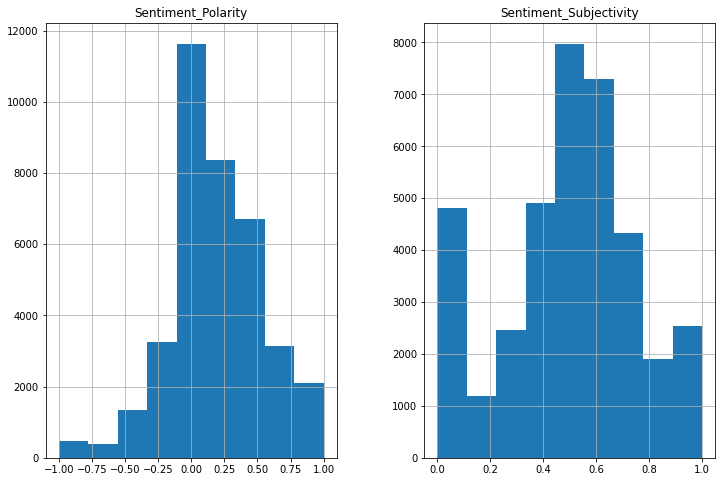

In [ ]:
hist = data_user_reviews.hist(bins=9, figsize=(12,8))

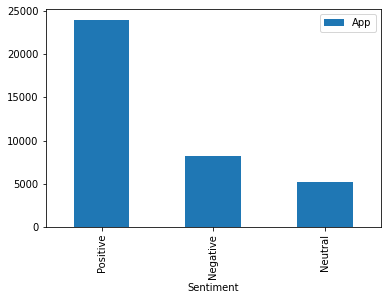

In [ ]:
sentiment = data_user_reviews[['App', 'Sentiment']].groupby('Sentiment').count().sort_values(by='App', ascending=False)
fig = sentiment.plot.bar()

In [ ]:
# app = data_user_reviews.groupby(['App', 'Sentiment']).size().unstack(fill_value=0)
# app = pd.DataFrame

# app = pd.DataFrame(data_user_reviews.groupby(['App'])['Sentiment'].value_counts())
# fig = app.plot.bar(figsize=(25,8))


In [ ]:

app = pd.DataFrame(data_user_reviews[['Sentiment','App']].groupby(['Sentiment','App']).Sentiment.count())
app.index = app.index.set_names(['Sentiment_Type', 'App'])
# app.reset_index(inplace=True)
app


Sentiment
Sentiment_Type App                                                          
Negative       10 Best Foods for You                                      10
               104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                            1
               11st                                                        7
               1800 Contacts - Lens Store                                  6
               1LINE – One Line with One Touch                             8
...                                                                      ...
Positive       Hotels.com: Book Hotel Rooms & Find Vacation Deals         39
               Hotspot Shield Free VPN Proxy & Wi-Fi Security             17
               Hotstar                                                    14
               Hotwire Hotel & Car Rental App                             16
               Housing-Real Estate & Property                              8

[2376 rows x 1 columns]

In [ ]:
app.reset_index(inplace=True)  


In [ ]:
app_negative=app[app['Sentiment_Type'] == 'Negative']
app_neutral=app[app['Sentiment_Type'] == 'Neutral']
app_positive=app[app['Sentiment_Type'] == 'Positive']

Text(0.5, 1.0, 'positive')

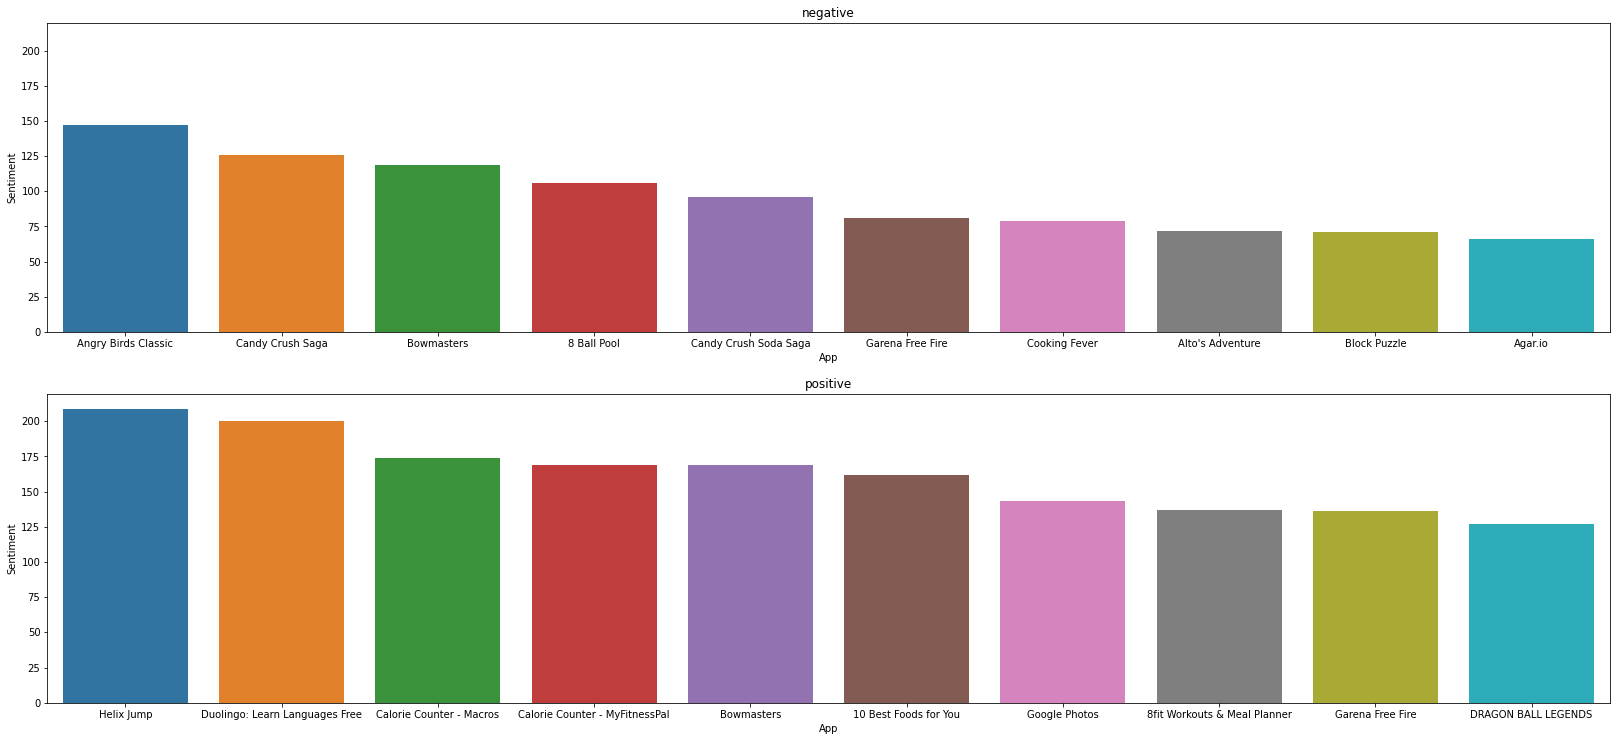

In [ ]:
app_sns_negative = app_negative.sort_values(by='Sentiment',ascending=False).head(10)
app_sns_neutral = app_neutral.sort_values(by='Sentiment',ascending=False).head(10)
app_sns_positive = app_positive.sort_values(by='Sentiment',ascending=False).head(10)

fig, axes = plt.subplots(2, figsize=(28, 4), sharey=True)
fig.subplots_adjust( bottom=.04, top=2.4)
sns.barplot( x=app_sns_negative.App,  y=app_sns_negative.Sentiment,ax=axes[0]).set_title('negative')
sns.barplot(x=app_sns_positive.App,  y=app_sns_positive.Sentiment,ax=axes[1]).set_title('positive')
# plt.xticks(rotation=90)

In [ ]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.815209e+07,1.546434e+07,1.027368
std,0.480342,2.927761e+06,2.217061e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


Na sequência verificamos também a distribuição dos dados com o histograma

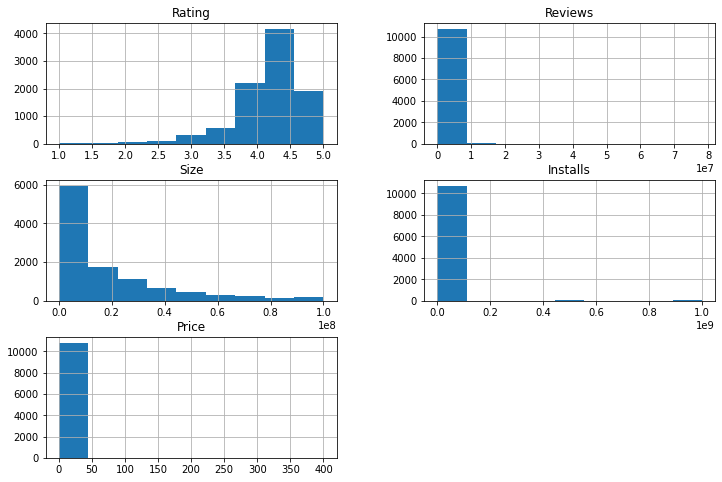

In [ ]:
hist = data.hist(bins=9, figsize=(12,8))

Desso modo, foi possível concluir que para as variáveis podemos destacar as seguintes observações,
*   Rating: Apresenta maior concentração em valores próximos de 4, porém, existem variações entre 1 e 5.
*   Reviews:Possuem alta variação. Os valores estão entre a casa de 10¹ e 10⁷.
*   Size: Também possui alta variação, mas os valores estão concentrados na casa de 10⁶.
*   Installs: Apresenta a maior variação de todas as variável.
*   Price: Possui variação baixa e a maioria dos valores estão em 0.

Ainda obtemos os diagramas de caixa das variáveis,


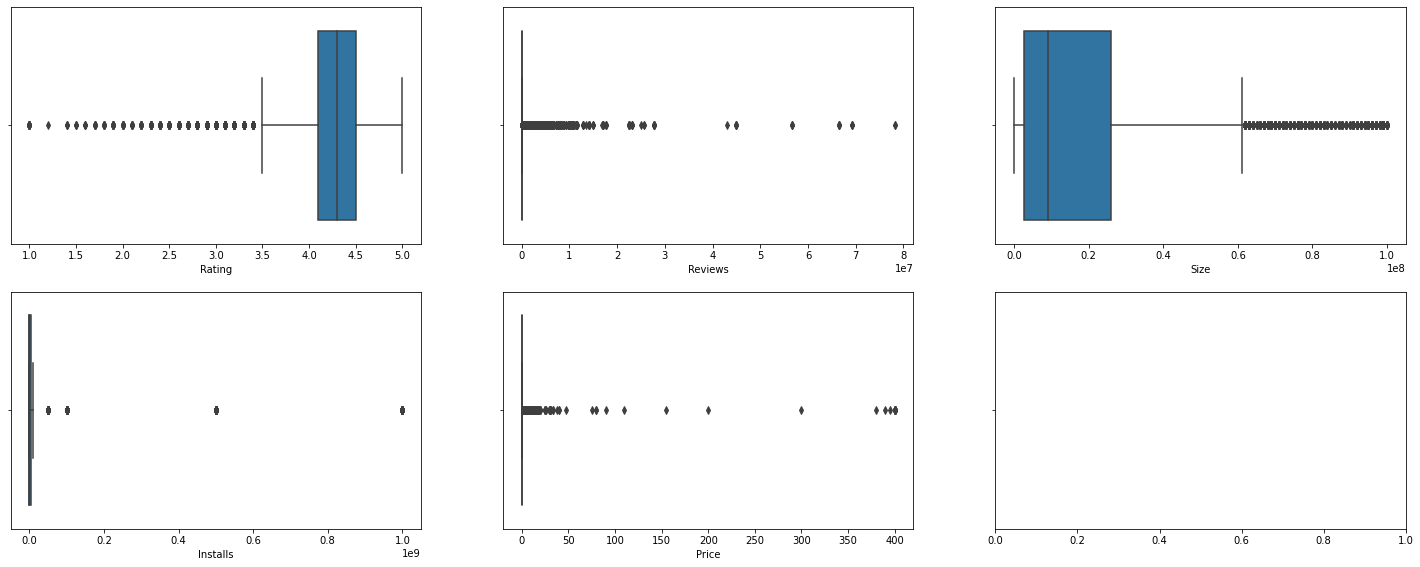

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25, 5), sharey=True)
fig.subplots_adjust( bottom=0.05, top=1.5)
sns.boxplot(x=data['Rating'],ax=axes[0, 0])
sns.boxplot(x=data['Reviews'], ax=axes[0, 1])
sns.boxplot(x=data['Size'], ax=axes[0, 2])
sns.boxplot(x=data['Installs'], ax=axes[1, 0])
sns.boxplot(x=data['Price'], ax=axes[1, 1])



Com o box plot percebemos que os dados possuem alguns outliers como já estipulado com os gráficos anteriores. 

##Variáveis categóricas e de identificação

As análises realizadas a seguir buscam relacionar também os dados categóricos e de identificação. Primeiro obtivemos os dez primeiros aplicativos que possuiam maior número de Installs,



In [ ]:
data[data['Installs']>2]
data.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703.0,76000000,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208.0,0,1.000000e+09,Free,0.0,Everyone 10+,Social,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211.0,0,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211.0,0,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051.0,0,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,0,1.000000e+09,Free,0.0,Everyone 10+,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538.0,0,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,0,1.000000e+09,Free,0.0,Everyone 10+,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


Os aplicativos ainda foram agrupados pela variável Category para obter as dez categorias que possuiam maior agrupamento de aplicativos.

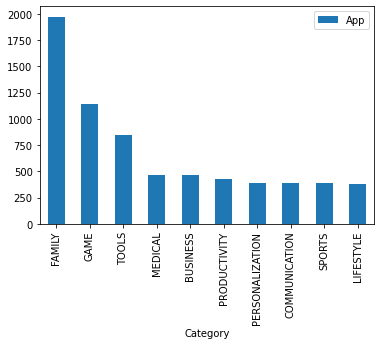

In [ ]:
top10_category = data[['App', 'Category']].groupby('Category').count().sort_values(by='App', ascending=False).head(10)
fig = top10_category.plot.bar()


Já pela contagem dos aplicativos agrupados por Content Rating percebemos que os aplicativos livre para todas as faixas etárias estão em maioria, seguidos pelos aplicativos voltados para pessoas maiores de 10 anos e pessoas maiores de 18 anos.

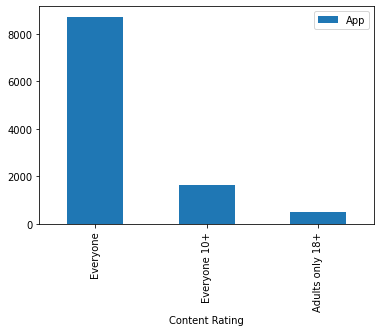

In [ ]:
contentRating = data[['App', 'Content Rating']].groupby('Content Rating').count().sort_values(by='App', ascending=False)
fig = contentRating.plot.bar()

A contagem dos aplicativos pagos e gratuitos mostram que os gratuitos estão em maior quantidade.

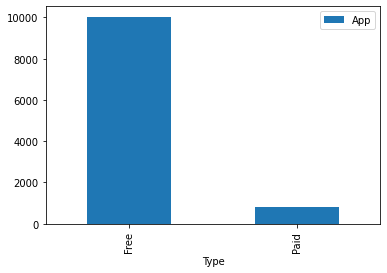

In [ ]:
price = data[['App', 'Type']].groupby('Type').count().sort_values(by='App', ascending=False)
fig = price.plot.bar()

Já em relação a variável Rating temos que a maioria dos aplicativos possuem avaliação a partir de 4 estrelas. Ao dividir essa avaliação para os aplicativos pagas e gratuitos na mesma figura percebemos que apesar dos aplicativos pagas estarem em menor número eles estão mais bem avaliados, pois o pico da distribuição destes está a frente do pico da distribuição dos aplciativos gratuitos.

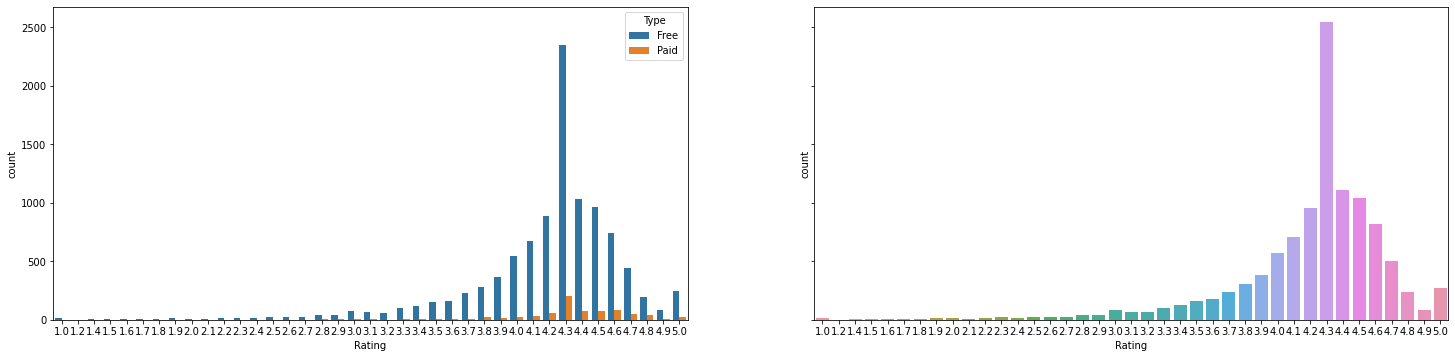

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 3), sharey=True)
fig.subplots_adjust( bottom=0.05, top=1.5)
sns.countplot(hue=data.Type, x=data.Rating,ax=axes[0])
sns.countplot(x=data.Rating,ax=axes[1])

##Correlação dos dados

Para verificar como os dados se correlacionam obtemos a matriz de gráficos de dispersão, entretanto, os dados não parecem se correlacionar.

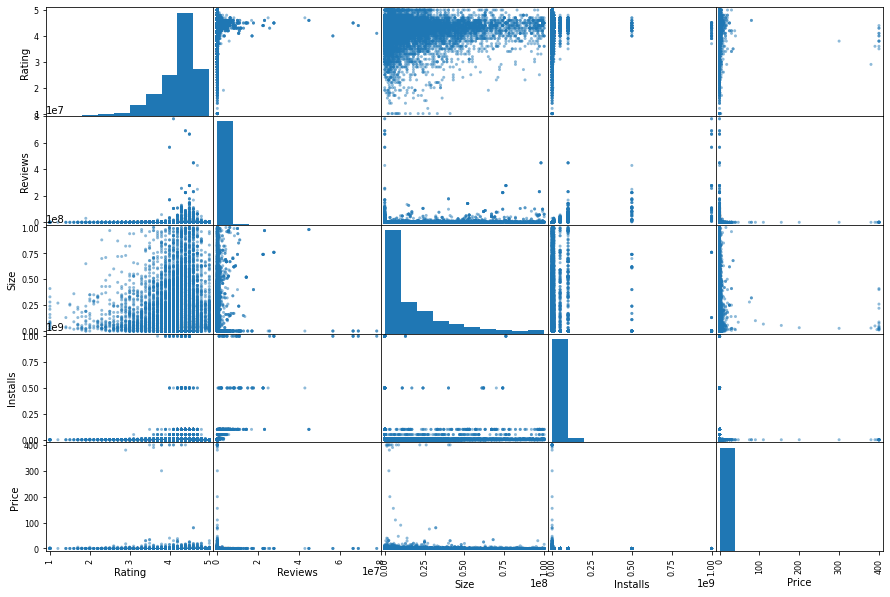

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(15, 10));


Para concluir se existe ou não  geramos o mapa de calor para correlação entre os dados e percebemos que a relação entre Installs-Reviews é a única que possui maior possibilidade de correlação.

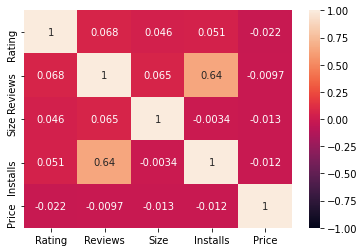

In [ ]:
fig = sns.heatmap(data.corr(), vmax=1, vmin=-1, annot = True)


#PREPARAÇÃO PARA O ML
Para prepararmos os dados para o Machine Learning vamos transformar os dados categóricos em variáveis com valores binários.

In [ ]:
# from sklearn.preprocessing import LabelBinarizer

# encoder = LabelBinarizer()
# data['Type'] = encoder.fit_transform(data['Type'].astype(str))

# encoder.classes_

# encoderContentRating = LabelBinarizer()
# x = encoderContentRating.fit_transform(data['Content Rating'].astype(str))

# encoderContentRating.classes_

# x = pd.DataFrame(data=x,columns=encoderContentRating.classes_)

# data.drop(['Genres', 'Content Rating'], axis='columns', inplace=True)
# pd.concat([data, x,],axis=True)